In [1]:
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

import os

In [ ]:
# !mkdir("data")
# from bing_image_downloader import downloader

In [ ]:
# downloader.download("Elon Musk",limit = 500,output_dir='data')
# downloader.download("Bill Gates",limit = 500,output_dir='data')
# downloader.download("Jack Ma",limit = 500,output_dir='data')
# downloader.download("Modi",limit = 500,output_dir='data')
# downloader.download("Donald Trump",limit = 500,output_dir='data')
# downloader.download("Manmohan Singh",limit = 500,output_dir='data')

Bill Gates   gates0
[[174 171 169 ... 222 228 228]
 [173 171 168 ... 219 225 225]
 [172 170 167 ... 216 222 222]
 ...
 [102  90 108 ...  81  88  88]
 [127 103 104 ...  89  89  89]
 [137 108 100 ...  93  88  88]]
Jack Ma   jack0
[[30 30 30 ... 37 39 39]
 [30 30 30 ... 37 39 39]
 [30 30 30 ... 37 39 39]
 ...
 [63 62 61 ... 69 79 79]
 [85 62 65 ... 76 83 97]
 [85 62 65 ... 76 83 97]]


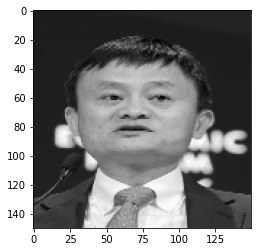

In [36]:
# main_dir = "C:\Users\user\Mini Project V\Dataset"
# train_dir = "train"
path_train = 'C:/Users/user/Mini Project V/Datasets/Train'

for name in os.listdir(path_train):
    for p in os.listdir(os.path.join(path_train,name)):
        category = p.split(".")[0]
        print(name," ",category)
        img_array = cv2.imread(os.path.join(os.path.join(os.path.join(path_train,name)),p),cv2.IMREAD_GRAYSCALE)
        print(img_array)
        new_img_array = cv2.resize(img_array, dsize=(150, 150))
        plt.imshow(new_img_array,cmap="gray")
        break

In [37]:
X = []
y = []

def create_test_data(path):
    count=0
    for name in os.listdir(path):
        for p in os.listdir(os.path.join(path,name)):
            print(name," ",count)
            img_array = cv2.imread(os.path.join(os.path.join(path,name),p),cv2.IMREAD_GRAYSCALE)
            print(img_array)
            new_img_array = np.array(cv2.resize(img_array, dsize=(150, 150)))
            X.append(new_img_array)
            y.append(count)
        count+=1

In [38]:
create_test_data(path_train)
X = np.array(X).reshape(-1, 150,150,1)
y = np.array(y)

Bill Gates   0
[[174 171 169 ... 222 228 228]
 [173 171 168 ... 219 225 225]
 [172 170 167 ... 216 222 222]
 ...
 [102  90 108 ...  81  88  88]
 [127 103 104 ...  89  89  89]
 [137 108 100 ...  93  88  88]]
Bill Gates   0
[[ 87  84  81 ... 107 110 110]
 [ 85  82  80 ... 108 110 110]
 [ 83  81  78 ... 109 110 110]
 ...
 [ 28  27  26 ...  48  47  47]
 [ 64  30  27 ...  48  48  75]
 [ 64  30  27 ...  48  48  75]]
Bill Gates   0
[[124 123 121 ... 174 178 178]
 [123 122 121 ... 171 177 177]
 [123 122 121 ... 168 175 175]
 ...
 [ 89  82  77 ... 109 113 113]
 [ 94  84  78 ... 109 117 117]
 [ 98  87  80 ... 110 120 120]]
Bill Gates   0
[[  9   7   5 ... 163 163 163]
 [  9   7   5 ... 156 168 168]
 [  8   7   6 ... 152 158 158]
 ...
 [ 24  24  24 ... 182 190 190]
 [ 63  24  20 ... 189 195 190]
 [ 63  24  20 ... 189 195 190]]
Bill Gates   0
[[ 0  1  3 ...  4  2  2]
 [ 1  2  4 ...  4  2  2]
 [ 3  4  7 ...  4  2  2]
 ...
 [17  0  8 ...  0  0 23]
 [47 16 11 ...  1 13 53]
 [62 15  2 ...  1  2 53]]
B

Bill Gates   0
[[195 192 189 ... 118 120 120]
 [194 191 188 ... 117 119 119]
 [193 190 187 ... 116 116 116]
 ...
 [ 90  90  89 ...  68  71  71]
 [ 98  91  86 ...  68  70  89]
 [ 98  91  86 ...  68  70  89]]
Bill Gates   0
[[ 45  45  45 ...  58  59  59]
 [ 45  45  45 ...  58  59  59]
 [ 45  45  45 ...  58  59  59]
 ...
 [151 152 154 ...  11   0  17]
 [151 153 155 ...  11  28  57]
 [151 153 155 ...  11  17  51]]
Bill Gates   0
[[ 73  72  72 ... 108 114 114]
 [ 72  72  71 ... 107 112 112]
 [ 72  72  71 ... 106 111 111]
 ...
 [ 19   1   6 ...   3   0  12]
 [ 43   5   2 ...   3  15  53]
 [ 60   7   0 ...   3   1  53]]
Bill Gates   0
[[ 2  2  2 ... 40 45 45]
 [ 2  2  2 ... 40 45 45]
 [ 2  2  2 ... 40 44 44]
 ...
 [68 70 67 ... 66 64 64]
 [81 65 63 ... 52 48 67]
 [81 65 63 ... 52 48 67]]
Bill Gates   0
[[229 227 226 ...  34  39  39]
 [228 226 224 ...  34  39  39]
 [205 203 201 ...  34  39  39]
 ...
 [ 39  21  41 ...  49  43  61]
 [ 56  32  44 ...  49  54  73]
 [ 72  40  45 ...  49  56  74]]
J

Jack Ma   1
[[ 22  22  22 ...  87  22  22]
 [ 22  22  22 ...  70  23  23]
 [ 22  22  22 ... 191 147 147]
 ...
 [ 29  31  30 ... 239 245 245]
 [ 70  27  34 ... 245 249 244]
 [ 70  27  34 ... 245 249 244]]
Jack Ma   1
[[ 3  3  3 ...  6  6  6]
 [ 3  3  3 ...  6  6  6]
 [ 3  3  3 ...  6  6  6]
 ...
 [21  0  2 ... 23 20 32]
 [49  7  2 ... 23 29 55]
 [66  8  0 ... 24 26 64]]
Jack Ma   1
[[25 25 25 ... 28 22 22]
 [25 25 25 ... 28 23 23]
 [25 25 25 ... 28 23 23]
 ...
 [21  0  0 ...  0  0  9]
 [43  5  0 ...  0 17 54]
 [58  7  0 ...  0  4 53]]
Jack Ma   1
[[ 10  10  10 ...  12  13  13]
 [ 10  10  10 ...  12  13  13]
 [ 10  10  10 ...  13  13  13]
 ...
 [117 115 112 ...  22  25  25]
 [125 115 105 ...  22  24  70]
 [125 115 105 ...  22  24  70]]
Jack Ma   1
[[104 100  95 ... 252 255 255]
 [103 100  95 ... 250 254 254]
 [103  99  94 ... 248 253 253]
 ...
 [ 66  62  60 ... 138 143 143]
 [ 73  65  60 ... 134 141 141]
 [ 79  67  60 ... 134 140 140]]
Jack Ma   1
[[31 31 31 ... 44 46 46]
 [30 30 30 ... 

In [39]:
#print(y)

In [40]:
#Normali

In [58]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#model.summary()

model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
model.fit(X, y, epochs=15, batch_size=50, validation_split=0.2, shuffle=True)

Epoch 1/15
5/5 [==============================] - 7s 1s/step - loss: 0.6838 - accuracy: 0.5694 - val_loss: 1.0302 - val_accuracy: 0.0000e+00
Epoch 2/15
5/5 [==============================] - 7s 1s/step - loss: 0.6762 - accuracy: 0.6343 - val_loss: 0.8542 - val_accuracy: 0.0000e+00
Epoch 3/15
5/5 [==============================] - 7s 1s/step - loss: 0.6550 - accuracy: 0.6343 - val_loss: 0.8155 - val_accuracy: 0.0000e+00
Epoch 4/15
5/5 [==============================] - 7s 1s/step - loss: 0.6438 - accuracy: 0.6343 - val_loss: 1.0465 - val_accuracy: 0.0000e+00
Epoch 5/15
5/5 [==============================] - 7s 1s/step - loss: 0.6480 - accuracy: 0.6389 - val_loss: 0.5793 - val_accuracy: 0.7818
Epoch 6/15
5/5 [==============================] - 7s 1s/step - loss: 0.6558 - accuracy: 0.6250 - val_loss: 0.8239 - val_accuracy: 0.1818
Epoch 7/15
5/5 [==============================] - 7s 1s/step - loss: 0.5923 - accuracy: 0.6806 - val_loss: 0.7907 - val_accuracy: 0.4364
Epoch 8/15
5/5 [=========

In [60]:
train_dir = "Test"
main_dir = 'C:/Users/user/Mini Project V/Datasets'
path = os.path.join(os.path.join(main_dir,train_dir))


X_test = []
id_line = []
def create_test1_data(path):
    for name in os.listdir(path):
        for p in os.listdir(os.path.join(path,name)):
            id_line.append(p.split(".")[0])
            img_array = cv2.imread(os.path.join(os.path.join(path,name),p),cv2.IMREAD_GRAYSCALE)
            new_img_array = cv2.resize(img_array, dsize=(150, 150))
            X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,150,150,1)
X_test = X_test/255
X_test

array([[[[0.66666667],
         [0.65882353],
         [0.65882353],
         ...,
         [0.85098039],
         [0.85098039],
         [0.87058824]],

        [[0.67058824],
         [0.65882353],
         [0.65882353],
         ...,
         [0.84313725],
         [0.84313725],
         [0.8627451 ]],

        [[0.68235294],
         [0.66666667],
         [0.6627451 ],
         ...,
         [0.84313725],
         [0.84313725],
         [0.86666667]],

        ...,

        [[0.45098039],
         [0.33333333],
         [0.39215686],
         ...,
         [0.30196078],
         [0.30588235],
         [0.3254902 ]],

        [[0.37254902],
         [0.31372549],
         [0.33333333],
         ...,
         [0.29411765],
         [0.30196078],
         [0.34509804]],

        [[0.36862745],
         [0.4       ],
         [0.42745098],
         ...,
         [0.29019608],
         [0.32941176],
         [0.34509804]]],


       [[[0.31764706],
         [0.30980392],
         [0.31

In [61]:
predictions = model.predict(X_test)

In [62]:
predicted_val = [int(round(p[0])) for p in predictions]
name = [os.listdir('C:/Users/user/Mini Project V/Datasets/Train')[i] for i in predicted_val]
print('Match Found From Testing.\n',name)

Match Found From Testing.
 ['Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Bill Gates', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Bill Gates', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma', 'Jack Ma']


In [63]:
submission_df = pd.DataFrame({'name':name, 'id':id_line, 'label':predicted_val})
submission_df

,name,id,label
0,Bill Gates,gates0,0
1,Bill Gates,gates1,0
2,Bill Gates,gates10,0
3,Bill Gates,gates11,0
4,Bill Gates,gates12,0
5,Bill Gates,gates13,0
6,Bill Gates,gates14,0
7,Bill Gates,gates15,0
8,Bill Gates,gates16,0
9,Bill Gates,gates17,0


In [64]:
submission_df.to_csv("submission.csv", index=False)